## ສ້າງ Chatbot ໂດຍໃຊ້ Multiple Tool ໂດຍໃຊ້ Langgraph

**ArxivQueryRun ?**
  - ເປັນ tool ສຳຫຼັບຄົ້ນຫາເອກະສານວິທະຍາສາດຈາກ arXiv
  - arXiv = ຖານຂໍ້ມູນເອກະສານວິທະຍາສາດອອນລາຍ
  - ໃຊ້ຄົ້ນຫາ research papers, preprints ໃນດ້ານຟີຊິກ, ຄະນິດສາດ, ຄອມພິວເຕີສາດ
  - ສາມາດຄົ້ນຫາດ້ວຍຄຳສຳຄັນ, ຊື່ຜູ້ຂຽນ, ຫຼື ຫົວຂໍ້

**WikipediaQueryRun ?**
  - ເປັນ tool ສຳຫຼັບຄົ້ນຫາຂໍ້ມູນຈາກ Wikipedia
  - ໃຫ້ຂໍ້ມູນທົ່ວໄປເກີ່ຍວກັບບຸກຄົນ, ສະຖານທີ່, ເຫດການ, ແນວຄວາມຄິດ
  - ອ່ານງ່າຍກວ່າເອກະສານວິທະຍາສາດ

**WikipediaAPIWrapper ?**
 - ເປັນ utility class ທີ່ຫໍ່ຫຸ້ມ Wikipedia API
 - ຈັດການການສື່ສານກັບ Wikipedia servers
 - ກຳນົດຄວາມຍາວຂອງຜົນລັບ, ພາສາ, ແລະ ຕົວເລືອກອື່ນໆ
 - ເຮັດໃຫ້ການໃຊ້ Wikipedia API ງ່າຍຂຶ້ນ

 **ArxivAPIWrapper ?** 
 - ເປັນ utility class ທີ່ຫໍ່ຫຸ້ມ arXiv API
 - ຈັດການການຄົ້ນຫາແລະການດຶງຂໍ້ມູນຈາກ arXiv
 - ກຳນົດຈຳນວນຜົນລັບ, ຟີລເຕີຂໍ້ມູນ
 - ຈັດຮູບແບບຜົນລັບໃຫ້ເໝາະສຳຫຼັບການນຳໃຊ້ 

In [ ]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper
from langchain_core.messages import HumanMessage
from google.oauth2 import service_account
from langchain_google_vertexai import ChatVertexAI
from dotenv import load_dotenv
load_dotenv() 


import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

# Optional
# os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY") 


In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=1000)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("Attention iss all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time on the performance of\nLlama-v2 models. We find that dropping dreeper attention layers only marginally\ndecreases performance but leads to the best speedups alongside dropping entire\nlayers. For example, removing 33\\% of attention layers in a 13B Llama2 model\nresults in a 1.8\\% drop in average performance over the OpenLLM benchmark. We\nalso observe that skipping layers except the latter layers reduces performances\nfor more layers skipped, except for skipping the attention layers.\n\n

In [4]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=1000)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [5]:
wiki.invoke("What is RAG")

'Page: Retrieval-augmented generation\nSummary: Retrieval-augmented generation (RAG) is a technique that enables large language models (LLMs) to retrieve and incorporate new information. With RAG, LLMs do not respond to user queries until they refer to a specified set of documents. These documents supplement information from the LLM\'s pre-existing training data. This allows LLMs to use domain-specific and/or updated information that is not available in the training data. For example, this helps LLM-based chatbots access internal company data or generate responses based on authoritative sources.\nRAG improves large language models (LLMs) by incorporating information retrieval before generating responses. Unlike traditional LLMs that rely on static training data, RAG pulls relevant text from databases, uploaded documents, or web sources. According to Ars Technica, "RAG is a way of improving LLM performance, in essence by blending the LLM process with a web search or other document look-

In [6]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\Kenshin\AppData\Local\Temp\ipykernel_5376\3584238.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [7]:
tavily.invoke("summarize Google I/O 2025")

[{'title': 'Highlights from the Dialogues stage at I/O 2025 - Google Blog',
  'url': 'https://blog.google/technology/developers/google-io-2025-dialogues-ai-quantum-storytelling/',
  'content': "Google I/O 2025's Dialogues stage showcased AI's impact on society.\n   Discussions covered AI advancements, AGI, and quantum computing.\n   Speakers included top Google leaders and outside visionaries.\n   AI's role in science, storytelling, and autonomous driving was explored.\n   Sustainability in AI development was also a key discussion point.\n\n Summaries were generated by Google AI. Generative AI is experimental. \n\nShare\n\nTwitterFacebookLinkedInMail\n\nCopy link [...] Last week, the Dialogues stage at Google I/O 2025 brought together Google leaders and visionaries like director Darren Aronofsky for conversations on the technological breakthroughs helping to shape society and our future. The talks explored AI innovations and some of the biggest opportunities and questions facing us tod

In [8]:
### Combine all the tools in the list

tools=[arxiv,wiki,tavily]

#### Optional
```python
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen/qwen3-32b")

llm_with_tools=llm.bind_tools(tools)
```

In [9]:
## Initialize my LLM model

# Configuration
JSON_KEY_PATH = r"C:\Users\Kenshin\Desktop\GoogleI-O\key.json" 
PROJECT_ID = os.getenv("GOOGLE_CLOUD_PROJECT") 
GOOGLE_LOCATION= os.getenv("GOOGLE_LOCATION")

try:
    # Load credentials
    credentials = service_account.Credentials.from_service_account_file(
        JSON_KEY_PATH,
        scopes=["https://www.googleapis.com/auth/cloud-platform"]
    )
    
    # Initialize LLM model (same variable name as your Groq setup)
    llm = ChatVertexAI(
        model_name="gemini-2.5-flash-lite",  
        project=PROJECT_ID,
        location=GOOGLE_LOCATION, 
        credentials=credentials,
        temperature=1.0
    )
    
    # Bind tools (same as your Groq setup)
    llm_with_tools = llm.bind_tools(tools)
    
    # Test the model
    response = llm.invoke("Hello! How are you today?")
    print(f"🤖 Response: {response.content}")

except Exception as e:
    print(f"Error occurred: {str(e)}")

🤖 Response: Hello there! I'm doing quite well, thank you for asking. I'm ready and eager to help you with anything you need. How about yourself? How are you doing today?


In [10]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent Google AI News")])

AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search_results_json', 'arguments': '{"query": "recent Google AI News"}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 164, 'candidates_token_count': 13, 'total_token_count': 177, 'prompt_tokens_details': [{'modality': 1, 'token_count': 164}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 13}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.1420499453177819, 'model_name': 'gemini-2.5-flash-lite'}, id='run--2db47f0c-8637-4f61-8ae5-94a4fc043b51-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent Google AI News'}, 'id': '49c6f9e7-06c1-4826-86e2-bdab9d289064', 'type': 'tool_call'}], usage_metadata={'input_tokens': 164, 'output_tokens': 13, 'total_tokens': 177, 'input_token_details': {'cache_read': 0}})

In [11]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

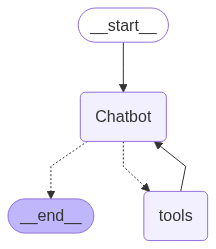

In [12]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition
def response_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("Chatbot", response_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "Chatbot")
builder.add_conditional_edges(
    "Chatbot", 
    tools_condition,
)
builder.add_edge("tools", "Chatbot")


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [13]:
messages=graph.invoke({"messages":HumanMessage(content="What is attention is all you need")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is attention is all you need
================================== Ai Message ==================================
Tool Calls:
  wikipedia (114cf02b-d351-495f-8d82-02bac3dc585e)
 Call ID: 114cf02b-d351-495f-8d82-02bac3dc585e
  Args:
    query: Attention Is All You Need
================================= Tool Message =================================
Name: wikipedia

Page: Attention Is All You Need
Summary: "Attention Is All You Need" is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, and a main contributor to the AI boom, as the transformer approach has become the main architecture of a wide variety of AI, such as large language models. A

In [14]:
messages=graph.invoke({"messages":HumanMessage(content="What is machine learning")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is machine learning
================================== Ai Message ==================================
Tool Calls:
  wikipedia (e3cfe491-8cdf-4498-96b2-0a9e5f4108f2)
 Call ID: e3cfe491-8cdf-4498-96b2-0a9e5f4108f2
  Args:
    query: machine learning
================================= Tool Message =================================
Name: wikipedia

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML finds application in many fields, including natural language processin

In [16]:
messages=graph.invoke({"messages":HumanMessage(content="Summarize Google I/O 2025")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Summarize Google I/O 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (2ec7a0dc-cf4e-489f-a523-6ce26d414bdb)
 Call ID: 2ec7a0dc-cf4e-489f-a523-6ce26d414bdb
  Args:
    query: Google I/O 2025 summary
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Highlights from the Dialogues stage at I/O 2025 - Google Blog", "url": "https://blog.google/technology/developers/google-io-2025-dialogues-ai-quantum-storytelling/", "content": "Google I/O 2025's Dialogues stage showcased AI's impact on society.\n   Discussions covered AI advancements, AGI, and quantum computing.\n   Speakers included top Google leaders and outside visionaries.\n   AI's role in science, storytelling, and autonomous driving was explored.\n   Sustainability in AI development was also a key disc